In [4]:
import pandas as pd

import numpy as np
train_data = pd.read_csv("./boston-housing/train.csv")

In [5]:
train_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [82]:
## Get first 13 columns as X
X = train_data.values[:,1:-1]

## Normalize X
mean = X.mean(axis = 0)
std = X.std(axis = 0)
X_normalized = (X - mean)/std
X_normalized = np.c_[np.ones(X.shape[0]), X_normalized]
## Get last columns as y
y = train_data.values[:,-1].reshape((X.shape[0],1))

In [83]:
(y**2).mean()/2

301.1583183183183

In [88]:
compute_gradient(X_normalized, y, beta)

array([[-22.76876877],
       [  3.73215272],
       [ -3.15864342],
       [  4.34106694],
       [ -1.87214765],
       [  3.78344538],
       [ -6.31650037],
       [  3.28730307],
       [ -2.28462908],
       [  3.22650613],
       [  4.10424995],
       [  4.40925149],
       [ -3.08369504],
       [  6.7653427 ]])

In [89]:
## X: N x D matrix
## y: N x 1 matrix
## beta: D x 1 matrix

def compute_loss(X, y, beta):
    y_pred = X.dot(beta)
    loss = 1/2 * ((y_pred - y)**2).mean()
    return loss

def compute_gradient(X, y, beta):
    N = X.shape[0]
    grad = 1/N * X.T.dot(X.dot(beta) - y)
    return grad

In [90]:
def backtracking_gd(X, y, beta):
    lr = 1
    rho = 0.8
    c1 = 1e-3
    grad = compute_gradient(X, y, beta)
    while compute_loss(X, y, beta - lr * grad) > compute_loss(X, y, beta) - c1 * lr * grad.T.dot(grad):
        lr = rho * lr
    return lr

In [91]:
def backtracking_accelerated_gd(X, y, beta, last_lr):
    lr = last_lr
    rho = 0.8
    c1 = 1e-3
    
    grad = compute_gradient(X, y, beta)
    while compute_loss(X, y, beta - lr * grad) > compute_loss(X, y, beta) -  lr * grad.T.dot(grad) + 1/(2*lr)* lr**2 * grad.T.dot(grad):
        lr = rho * lr
    return lr
    

In [92]:
## Gradient Decent 

# Initialize weight value:
np.random.seed(1)


beta = np.zeros((X_normalized.shape[1],1))

def gd_optimizer(X, y, beta, num_steps, learning_rate, show_progress = False):
    losses = []
    for step in range(num_steps):
        loss = compute_loss(X, y, beta)
        losses.append(loss)
        grad = compute_gradient(X, y, beta)
        beta = beta - learning_rate * grad

        if step %1000 == 0 and show_progress:
            print('*'*50)
            print("Step", step, "Loss value", loss)
    
    return losses, beta

    

In [93]:
def gd_optimizer_backtracking(X, y, beta, num_steps, show_progress = False):
    losses = []
    lrs = []
    for step in range(num_steps):
        loss = compute_loss(X, y, beta)
        losses.append(loss)
        grad = compute_gradient(X, y, beta)
        learning_rate = backtracking_gd(X, y, beta)
        
        beta = beta - learning_rate * grad
        
        lrs.append(learning_rate)
        
        if step %1000 == 0 and show_progress:
            print('*'*50)
            print("Step", step, "Loss value", loss)
    
    return losses, beta, lrs

In [94]:
def accelerated_gd_optimizer(X, y, beta, num_steps, learning_rate, show_progress = False):
    losses = []
    for step in range(num_steps):
        loss = compute_loss(X_normalized, y, beta)
        losses.append(loss)
        if step == 0:
            grad = compute_gradient(X_normalized, y, beta)
            last_beta = beta
            beta = beta - learning_rate * grad
        else:
            v = beta + (step-1)/(step+2) * (beta - last_beta)
            last_beta = beta
            grad = compute_gradient(X_normalized, y, v) 
            beta = v - learning_rate * grad     
        if step %1000 == 0 and show_progress:
            print('*'*50)
            print("Step", step, "Loss value", loss)
    
    return losses, beta



In [95]:
def accelerated_gd_optimizer_backtracking(X, y, beta, num_steps, show_progress = False):
    losses = []
    lr = 1
    lrs = []
    for step in range(num_steps):
        loss = compute_loss(X_normalized, y, beta)
        losses.append(loss)
        if step == 0:
            grad = compute_gradient(X_normalized, y, beta)
            last_beta = beta
            lr = backtracking_accelerated_gd(X, y, beta, lr)
            beta = beta - lr * grad
        else:
            v = beta + (step-1)/(step+2) * (beta - last_beta)
            last_beta = beta
            grad = compute_gradient(X_normalized, y, v)
            lr = backtracking_accelerated_gd(X, y, beta, lr)
            beta = v - lr * grad     
        
        lrs.append(lr)
        if step %1000 == 0 and show_progress:
            print('*'*50)
            print("Step", step, "Loss value", loss)
    
    return losses, beta, lrs



In [96]:
acc_gd_backtracking_losses, acc_gd_backtracking_beta, acc_gd_backtracking_lrs = accelerated_gd_optimizer_backtracking(X_normalized, y, beta, 2000)
gd_backtracking_losses, gd_backtracking_beta, gd_backtracking_lrs = gd_optimizer_backtracking(X_normalized, y, beta, 2000)

acc_gd_losses_001, acc_gd_beta_001 = accelerated_gd_optimizer(X, y, beta, 2000, 0.001)
gd_losses_001, gd_beta_001 = gd_optimizer(X_normalized, y, beta, 2000, 0.001)    

gd_losses_01, gd_beta_01 = gd_optimizer(X_normalized, y, beta, 2000, 0.01)    
acc_gd_losses_01, acc_gd_beta_01 = accelerated_gd_optimizer(X, y, beta, 2000, 0.01)

gd_losses_1, gd_beta_1 = gd_optimizer(X_normalized, y, beta, 2000, 0.1)    
acc_gd_losses_1, acc_gd_beta_1 = accelerated_gd_optimizer(X, y, beta, 2000, 0.1)


In [97]:
history_df = pd.DataFrame()
history_df['GD backtracking'] = gd_backtracking_losses
history_df['Acc GD backtracking'] = acc_gd_backtracking_losses

In [98]:
history_df['GD lr 0.001'] = gd_losses_001
history_df['Acc GD lr 0.001'] = acc_gd_losses_001

history_df['GD lr 0.01'] = gd_losses_01
history_df['Acc GD lr 0.01'] = acc_gd_losses_01

history_df['GD lr 0.1'] = gd_losses_1
history_df['Acc GD lr 0.1'] = acc_gd_losses_1


In [99]:
history_df['GD lr'] = gd_backtracking_lrs
history_df['Acc GD lr'] = acc_gd_backtracking_lrs


In [100]:
iplot(history_df['Acc GD lr'].iplot(asFigure = True))

In [101]:
iplot(history_df['GD lr'].iplot(asFigure = True))

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(True)
import cufflinks

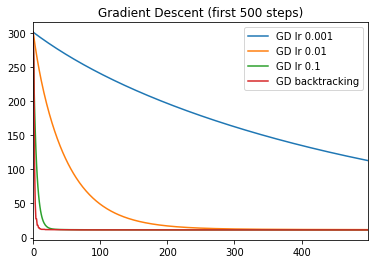

In [104]:
history_df[['GD lr 0.001', 'GD lr 0.01', 'GD lr 0.1', 'GD backtracking']].iloc[:500].plot( title = 'Gradient Descent (first 500 steps)')

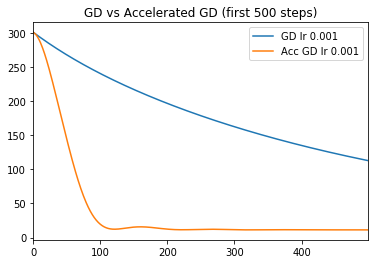

In [105]:
history_df[['GD lr 0.001', 'Acc GD lr 0.001']].iloc[:500].plot( title = 'GD vs Accelerated GD (first 500 steps)')

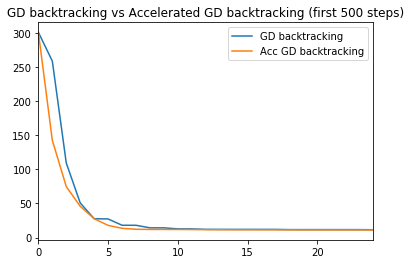

In [106]:
history_df[['GD backtracking', 'Acc GD backtracking']].iloc[:25].plot( title = 'GD backtracking vs Accelerated GD backtracking (first 500 steps)')

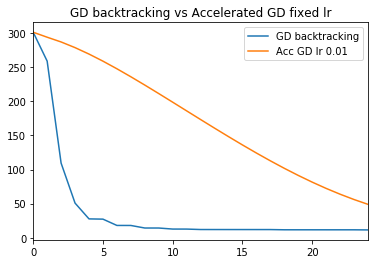

In [107]:
history_df[['GD backtracking', 'Acc GD lr 0.01']].iloc[:25].plot( title = 'GD backtracking vs Accelerated GD fixed lr')

In [108]:
iplot(history_df.iplot(asFigure = True))

In [109]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [110]:
reg.fit(X_normalized, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
y_pred = reg.predict(X_normalized) 

In [117]:
((y_pred - y)**2).mean()/2

11.194774720210413

In [116]:
y_pred = X_normalized.dot(acc_gd_backtracking_beta)

In [45]:
y_pred

array([[ 2.58283469e+00],
       [-1.54481616e+01],
       [ 1.26673723e+01],
       [ 3.15731145e+00],
       [-3.07351576e+01],
       [-6.31302410e+01],
       [-3.42755743e+01],
       [-4.49575430e+01],
       [-1.34380228e+01],
       [-2.13164499e+01],
       [-1.47316269e+01],
       [-6.42869923e+00],
       [-2.96136418e+01],
       [-6.84108094e+01],
       [-3.67860228e+01],
       [-5.67010003e+01],
       [-6.27516711e+01],
       [-5.09897745e+01],
       [-7.45386934e+01],
       [-3.30838556e+01],
       [-6.36727327e+01],
       [-2.12350022e+01],
       [ 5.42767255e+00],
       [ 1.67942668e+01],
       [-2.35648489e+00],
       [-9.05559410e+00],
       [-1.84295596e+01],
       [-2.25866027e+01],
       [-3.87706796e+01],
       [-5.74376163e+01],
       [-4.80426950e+01],
       [-3.51964091e+01],
       [-1.77608455e+01],
       [-1.39771658e+01],
       [-4.11372874e+01],
       [ 5.70705790e+00],
       [-1.42324926e+00],
       [ 7.77260063e+00],
       [-6.8